# Clustering

Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

## Segmenting Customers

The problem that this project intends to solve is to segment customers into different groups based on their shopping trends.

In [2]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading the data

The dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, I will retain only two of these five columns. I will remove CustomerID column, Genre, and Age column. And I will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [3]:
# load the data
shopping_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/shopping_data.csv')
shopping_data.rename(
    columns={
        'CustomerID': 'customer_id',
        'Genre': 'genre',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    },
    inplace=True
)
display(shopping_data.head())

# Retaining only anual_income and spending_score for clustering
df=shopping_data[['annual_income','spending_score']]
df.head()

,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Hierarchical Clustering
First, I will apply hierarchical clustering and use dendrogram to help me find the number of clusters within the data that makes sense.

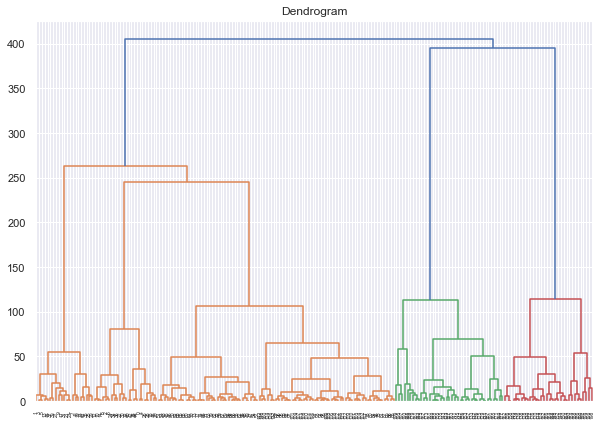

In [4]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend= shc.dendrogram(shc.linkage(df, method='ward'))

In [4]:
#We can observe from the Dendrogram that there are mainly 5 distingushed 
#clusters.

**Applying hierarchical clustering based on the number of clusters picked from the dendrogram, and visualizing the results using scatterplot.**

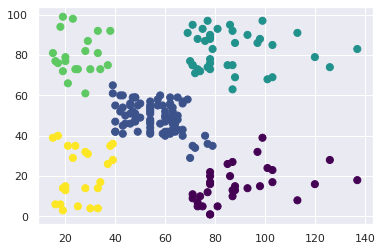

In [21]:
from sklearn.cluster import AgglomerativeClustering

hc= AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_ward =hc.fit_predict(df)
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=y_ward,s=50,cmap='viridis')
plt.show()

### K-means Clustering
Then, I will apply k-means to the same data and visualize the results.

**Varying the number of K from 2 to 10 and plotting the Sum of Squared Error (SSE) as K increases and picking up the value of K that makes sense.**

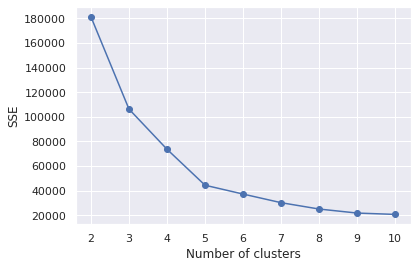

In [22]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans
SSE=[]
for k in range(2,11):
  kmeans= KMeans(n_clusters=k, random_state=0)
  kmeans.fit(df)
  SSE.append(kmeans.inertia_)

plt.plot(range(2,11),SSE,'-o')
plt.ylabel('SSE')
plt.xlabel('Number of clusters')
plt.show()

In [11]:
#We can observe again that 5 clusters was a great option 
#since it's an elbow point and from there on the reduction in SSE from generating more clusters is not very significant.

**Clustering the data using K-means based on the pre-defined value of K from the previous step and and visualizing the results using scatterplot. **

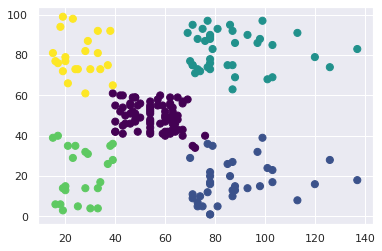

In [20]:
Kmeans=KMeans(n_clusters=5)
Kmeans.fit(df)
y_means= Kmeans.predict(df)
plt.scatter(df.iloc[:,0],df.iloc[:,1], c=y_means, s=50,cmap='viridis')
plt.show()

## Clasifying Papers
I will be using the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means. 

I will be varying the number of K from 2 to 6 and showing if the results vary and assess the clusters obtained.


In [44]:
# Loading the Relevant libraries
import sklearn as sk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score

# URL for the AAAI (UW Repository)
aaai_data = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/AAAI2014AcceptedPapers.csv")


In [89]:
df=aaai_data['title'].values.astype("U")
vectorizer=TfidfVectorizer(stop_words='english')
df=vectorizer.fit_transform(df)
for k in range(2,7):
  kmeans= KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
  kmeans.fit(df)
  print('--------------')
  print("Top terms per cluster:")
  order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
  terms = vectorizer.get_feature_names_out()
  for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    

--------------
Top terms per cluster:
Cluster 0:
 based
 linear
 embedding
 quality
 data
 search
 constraint
 analysis
 monte
 carlo
Cluster 1:
 learning
 multi
 using
 based
 planning
 model
 social
 online
 sparse
 search
--------------
Top terms per cluster:
Cluster 0:
 learning
 multi
 models
 social
 sparse
 using
 games
 data
 natural
 robust
Cluster 1:
 planning
 model
 based
 constraints
 search
 using
 counting
 checking
 uncertainty
 framework
Cluster 2:
 classification
 supervised
 analysis
 image
 learning
 embedding
 based
 using
 group
 social
--------------
Top terms per cluster:
Cluster 0:
 using
 model
 based
 planning
 search
 social
 games
 probabilistic
 linear
 online
Cluster 1:
 learning
 sparse
 multi
 view
 transfer
 robust
 instance
 bayesian
 models
 feature
Cluster 2:
 language
 based
 agent
 natural
 robot
 search
 human
 group
 task
 multi
Cluster 3:
 classification
 machine
 approach
 text
 image
 learning
 web
 class
 transfer
 translation
--------------